In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Membuat variabel list kosong untuk menampung hasil berita
article_result = []
education_article = []
health_article = []

# Maksimal jumlah artikel yang ingin diambil
max_articles = 50

In [3]:
# Iterasi halaman dari 1 hingga 4 (atau sesuai kebutuhan)
for page_num in range(1, 5):
    if len(education_article) >= max_articles:
        break  # Hentikan jika jumlah artikel sudah mencapai batas
    
    url = f"https://indeks.kompas.com/?site=edukasi&page={page_num}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find_all('div', class_='articleItem')
    
    for article in articles:
        if len(education_article) >= max_articles:
            break  # Hentikan jika jumlah artikel sudah mencapai batas
        
        article_url = article.find('a', class_='article-link')['href']
        title = article.find('h2', class_='articleTitle').text.strip()
        category = article.find('div', class_='articlePost-subtitle').text.strip()
        date = article.find('div', class_='articlePost-date').text.strip()

        # Hanya ambil artikel dengan kategori 'Edu'
        if 'Edu' in category:
            cPage = requests.get(article_url)
            cSoup = BeautifulSoup(cPage.text, 'html.parser')

            content_paragraphs = cSoup.find('div', class_='read__content').find_all('p')
            content = "\n".join([p.text.strip() for p in content_paragraphs])
            
            # Append the article details to the results list
            education_article.append([title, content, date, category])
    
    if len(education_article) >= max_articles:
        break  # Hentikan jika jumlah artikel sudah mencapai batas

In [4]:
# Iterasi halaman dari 1 hingga 4 (atau sesuai kebutuhan)
for page_num in range(1, 5):
    if len(health_article) >= max_articles:
        break  # Hentikan jika jumlah artikel sudah mencapai batas
    
    url = "https://indeks.kompas.com/?site=health&page={}".format(page_num)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find_all('div', class_='articleItem')
    
    for article in articles:
        if len(health_article) >= max_articles:
            break  # Hentikan jika jumlah artikel sudah mencapai batas
        
        article_url = article.find('a', class_='article-link')['href']
        title = article.find('h2', class_='articleTitle').text.strip()
        category = article.find('div', class_='articlePost-subtitle').text.strip()
        date = article.find('div', class_='articlePost-date').text.strip()

        cPage = requests.get(article_url)
        cSoup = BeautifulSoup(cPage.text, 'html.parser')

        content_paragraphs = cSoup.find('div', class_='read__content').find_all('p')
        content = "\n".join([p.text.strip() for p in content_paragraphs])
        
        # Append the article details to the results list
        health_article.append([title, content, date, category])
    
    if len(health_article) >= max_articles:
        break  # Hentikan jika jumlah artikel sudah mencapai batas

In [5]:
article_result.extend(education_article)
article_result.extend(health_article)

In [6]:
# Convert the results into a DataFrame
df = pd.DataFrame(article_result, columns=['title', 'content', 'date', 'category'])

df

,title,content,date,category
0,"Ketua Prodi Statistika Matana University: ""Dat...",KOMPAS.com - Ketua Program Studi Statistika Ma...,12/09/2024,Edu
1,Dee Lestari Bagi Tips Tingkatkan Kreativitas P...,KOMPAS.com - Nama Dewi Lestari sudah dikenal m...,11/09/2024,Edu
2,2 Instansi Pemerintahan yang Masih Buka Pendaf...,KOMPAS.com - Ada dua instansi milik pemerintah...,11/09/2024,Edu
3,"Jadwal Pendaftaran STIS 2025, Siswa Kelas 12 S...",KOMPAS.com - Masuk Sekolah Tinggi Ilmu Statist...,11/09/2024,Edu
4,PKKMB UDB Surakarta Gandeng Kompas.com Asah Ke...,KOMPAS.com - Fakultas Hukum dan Bisnis Univers...,11/09/2024,Edu
...,...,...,...,...
95,Mewujudkan Desa/Kelurahan Bebas Stunting,TAHUN 2024 menjadi tahun krusial bagi Indonesi...,09/09/2024,Health
96,"Anak Juga Bisa Kolesterol Tinggi, Ini Bahayanya",KOMPAS.com - Orang biasanya baru peduli pada k...,09/09/2024,Health
97,Bagaimana Mengobati Hipoglikemia? Ini Caranya...,KOMPAS.com - Hipoglikemia bisa mengakibatkan p...,09/09/2024,Health
98,Cek Apa untuk Mengetahui Sakit Jantung? Beriku...,KOMPAS.com - Penyakit jantung masih menjadi pe...,09/09/2024,Health


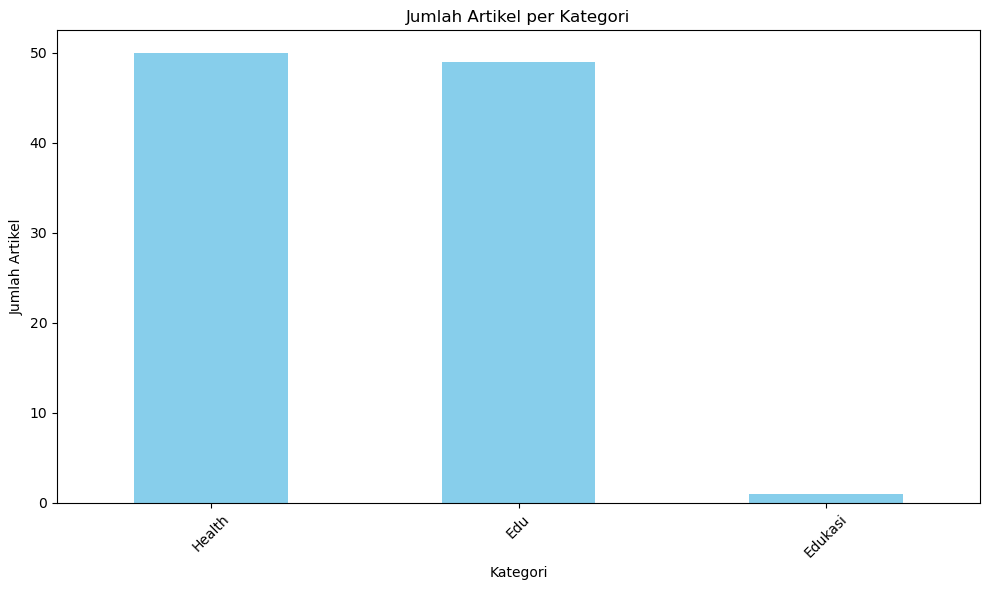

In [7]:
# Hitung jumlah artikel per kategori
category_counts = df['category'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
csv_filename = "crawling_2_kategori.csv"
df.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke crawling_2_kategori.csv


In [9]:
import pandas as pd

# Membaca file CSV menggunakan pandas
df = pd.read_csv('crawling_2_kategori.csv')



In [10]:
df

,title,content,date,category
0,"Ketua Prodi Statistika Matana University: ""Dat...",KOMPAS.com - Ketua Program Studi Statistika Ma...,12/09/2024,Edu
1,Dee Lestari Bagi Tips Tingkatkan Kreativitas P...,KOMPAS.com - Nama Dewi Lestari sudah dikenal m...,11/09/2024,Edu
2,2 Instansi Pemerintahan yang Masih Buka Pendaf...,KOMPAS.com - Ada dua instansi milik pemerintah...,11/09/2024,Edu
3,"Jadwal Pendaftaran STIS 2025, Siswa Kelas 12 S...",KOMPAS.com - Masuk Sekolah Tinggi Ilmu Statist...,11/09/2024,Edu
4,PKKMB UDB Surakarta Gandeng Kompas.com Asah Ke...,KOMPAS.com - Fakultas Hukum dan Bisnis Univers...,11/09/2024,Edu
...,...,...,...,...
95,Mewujudkan Desa/Kelurahan Bebas Stunting,TAHUN 2024 menjadi tahun krusial bagi Indonesi...,09/09/2024,Health
96,"Anak Juga Bisa Kolesterol Tinggi, Ini Bahayanya",KOMPAS.com - Orang biasanya baru peduli pada k...,09/09/2024,Health
97,Bagaimana Mengobati Hipoglikemia? Ini Caranya...,KOMPAS.com - Hipoglikemia bisa mengakibatkan p...,09/09/2024,Health
98,Cek Apa untuk Mengetahui Sakit Jantung? Beriku...,KOMPAS.com - Penyakit jantung masih menjadi pe...,09/09/2024,Health


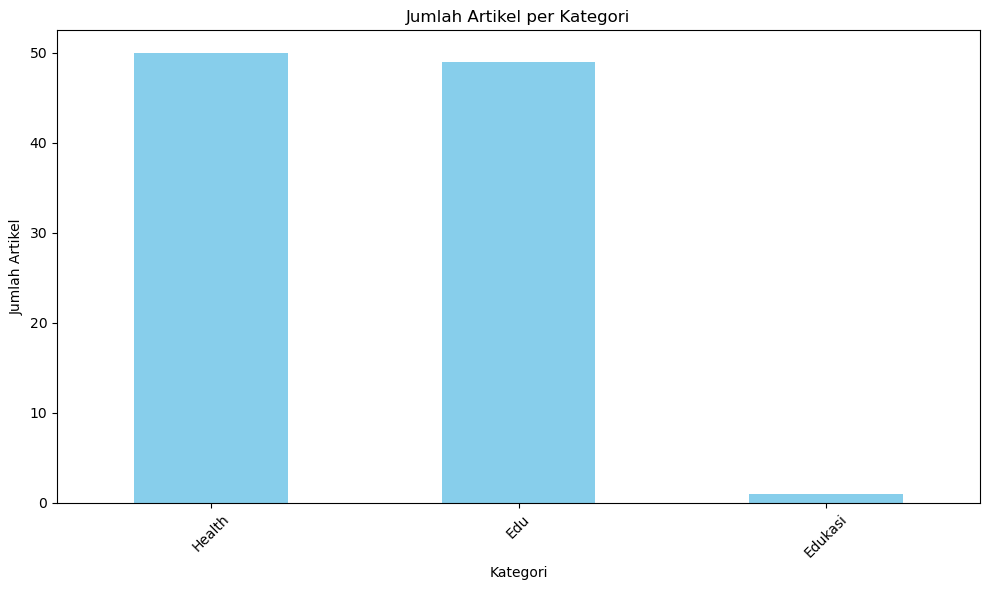

In [11]:
# Hitung jumlah artikel per kategori
category_counts = df['category'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()